# Classifying Emotions from Speech

## Project Overview

Classifying emotion from speech is an important task within the field of speech processing, and it involves analyzing acoustic and linguistic features of speech to identify the speaker's emotional state. The goal of emotion classification is to map speech signals to a set of predefined emotion categories, such as anger, sadness, happiness, fear etc. There are various techniques that are used for emotion classification from speech, such as acoustic features, linguistic features, and hybrid approaches. Acoustic features include pitch, intensity, and spectral characteristics, while linguistic features include the use of specific words or phrases. Hybrid approaches combine both acoustic and linguistic features to improve the accuracy of emotion classification.

The classification of emotion from speech has various applications in different fields. In healthcare, for example, it can be used to diagnose and monitor mental health conditions such as depression and anxiety. Emotion classification can also be used to improve customer service by identifying and responding to customers' emotions, increasing customer satisfaction. It can also be applied to education, where it can be used to assess students' emotional states and adjust the teaching style accordingly. In entertainment, emotion classification can be used to personalize the user experience by recommending music, movies, and other content based on the user's emotional state.

The aim of this project is to classify speech according to its emotion using machine learning and deep learning techniques. The project will involve collecting a dataset of speech recordings that have been labeled with specific emotions, such as anger, sadness, happiness, and others. The collected dataset will be preprocessed and transformed into features that can be used as inputs to machine learning and deep learning models. The project will then involve the selection and training of various machine learning and deep learning algorithms on the preprocessed dataset. The trained models will be then evaluated and compared. 

<!-- ### Algorithm used:

* Gradient Boosting
* Decision Tree
* Gaussian Naive Bayes
* MLP Classifier
* Random Forest
* AdaBoost
* KNN
* Logistic Regression
* Support Vector Machine (RBF & Linear)
* Stochastic Gradient Descent


### Databases used

* Toronto emotional speech set (TESS) -->

## Dataset Overview

There are several datasets available for speech emotion recognition that researchers can use to train and evaluate their models. These datasets are often labeled with various emotional states and provide a standardized benchmark for comparing different emotion recognition models. Among these, the [Toronto emotional speech set (TESS)](https://tspace.library.utoronto.ca/handle/1807/24487) is one of the most popular English speech dataset. It contains a list of 200 target words said by two English actresses between the ages of 26 and 64. Totaling 2800 audio samples, the database depicts seven emotions (anger, disgust, fear, happy, pleasantly surprise, sad, and neutral). Two actresses from the Greater Toronto Area were recruited. Both actresses are native English speakers with a university education and musical training. According to audiometric tests, both actresses have normal hearing thresholds.

### Dataset Structure

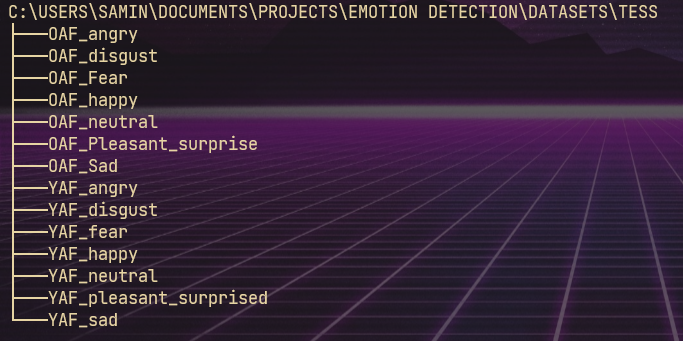
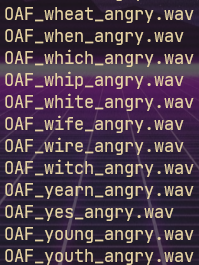

The dataset is structured in the following way:

* The dataset is divided into 7 folders, one for each emotion.
* The folder names are given by this format: AGE_EMOTION (e.g. OAF_fear).
* Age denotation: OAF = Old Adult Female, YAF = Young Adult Female.
* Each folder contains 200 audio files, each of which is a recording of a single word.
* The file names are given by this format: AGE_WORD_EMOTION (e.g. OAF_dead_angry.wav).
* Multiple recordings of the same word are available with different emotions (e.g. OAF_dead_angry.wav, OAF_dead_fear.wav).
* All the files are in lossless `.wav` format.
* The sampling rate is 22.5 kHz.

More details are discussed in the EDA section.


## Data Preprocessing & Exploratory Data Analysis

Data preprocessing and exploratory data analysis (EDA) are critical steps in any machine learning or data analysis project. These steps help to ensure that the data is clean, organized, and suitable for analysis, and they provide insights into the characteristics of the data.

Since our dataset is in the form of audio files, we need some way to convert them into a format that can be used as input to machine learning and deep learning models. First, we need to parse the audio files and extract all the necessary information from them like:

- File path
- Emotion
- Word spoken
- Age

This way, we will have a more conventional dataset to work one. After that, we need to load the audio files and extract features from them which will serve as the input to our models.


### Importing Libraries

The `os` library will be used for file manipulation.

In [1]:
import os

[Librosa](https://librosa.org/doc/latest/index.html) is a popular python library for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems. We will use it to extract features from audio files as well as to display various audio visualizations.

In [2]:
import librosa
import librosa.display

Numpy, pandas, matplotlib and searborn are used for data manipulation and visualization. `wordcloud` is used to visualize words in a pleasant manner.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from wordcloud import WordCloud
%matplotlib inline

`tqdm` is used to display a progress bar for long running tasks.

In [4]:
from tqdm import tqdm

Finally, `warnings` is used to stop all those annoying warnings.

In [5]:
import warnings
warnings.filterwarnings("ignore")

### Data Preprocessing

The `load_data()` function parses the audio files and extracts all the necessary informations and return it as a pandas dataframe.

In [6]:
def load_data(): 
    paths, emotions, ages, words = [],[],[],[]

    for dir, _, files in os.walk("../Datasets/Tess/"):
        for file in files:
            file_path = os.path.join(dir, file)
            age, word, emotion = file.split("_")
            emotion = emotion.split(".")[0]

            paths.append(file_path)
            emotions.append(emotion)
            words.append(word)

            if age == 'OAF':
                ages.append('old')
            else:
                ages.append('young')
            

    return pd.DataFrame({
        "file": paths,
        "age": ages,
        "word": words,
        "emotion": emotions
    })

After loading the data, we shuffle it to ensure that the model doesn't learn any patterns in the data.

In [7]:
df = load_data()
df = df.reindex(np.random.permutation(df.index)) # shuffling
df.index = range(len(df)) # reindexing
df

,file,age,word,emotion
0,../Datasets/Tess/OAF_disgust\OAF_mill_disgust.wav,old,mill,disgust
1,../Datasets/Tess/OAF_disgust\OAF_bought_disgus...,old,bought,disgust
2,../Datasets/Tess/YAF_angry\YAF_note_angry.wav,young,note,angry
3,../Datasets/Tess/OAF_angry\OAF_nice_angry.wav,old,nice,angry
4,../Datasets/Tess/YAF_pleasant_surprised\YAF_sh...,young,shirt,ps
...,...,...,...,...
2795,../Datasets/Tess/OAF_Fear\OAF_search_fear.wav,old,search,fear
2796,../Datasets/Tess/YAF_fear\YAF_met_fear.wav,young,met,fear
2797,../Datasets/Tess/YAF_happy\YAF_check_happy.wav,young,check,happy
2798,../Datasets/Tess/OAF_Pleasant_surprise\OAF_tim...,old,time,ps


### Exploratory Data Analysis

We can see the class distribution in the dataset in the following graph.

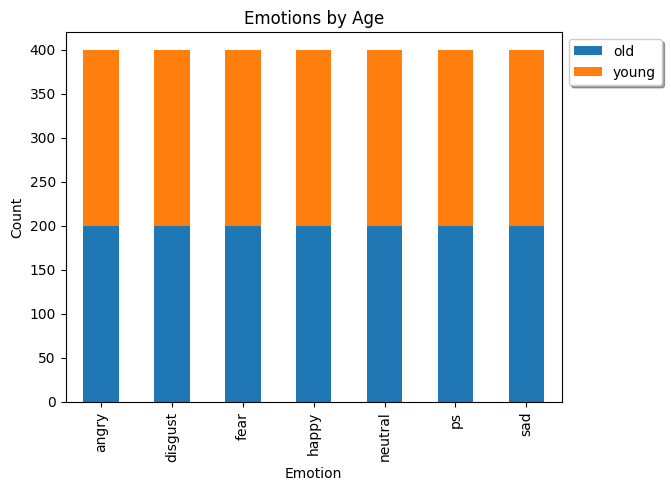

In [8]:
ax = df.groupby(["emotion", "age"]).size().reset_index().pivot(columns="age", index="emotion", values=0).plot(kind="bar", stacked=True, title="Emotions by Age", xlabel="Emotion", ylabel="Count")
ax.legend(loc='upper left', bbox_to_anchor=(1, 1),  fancybox=True, shadow=True)
plt.show()

Wordclouds are used to visualize the most common words in the dataset. We can see that various words with different syllables are spoken.

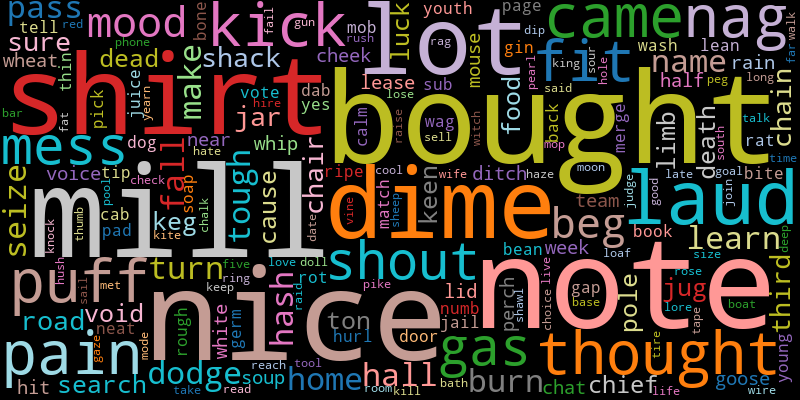

In [9]:
WordCloud(width=800, height=400, background_color='black', colormap='tab20', ).generate(" ".join(df.word)).to_image()

We extract the number of classes from the dataset.

In [10]:
emotion_classes = df.emotion.unique()
emotion_classes

array(['disgust', 'angry', 'ps', 'neutral', 'happy', 'sad', 'fear'],
      dtype=object)

In the upcoming sections, we will visualize various audio features and see how they differ for different emotions.

#### Waveplots

Wave plots are used to visualize the audio signal in the time domain. We can see that the audio signal is a one-dimensional array that contains the amplitude values of the audio signal at each time step. Librosa provides the `librosa.load()` function, which can be used to load audio files and convert them into a numpy array. The `librosa.load()` function takes the path to the audio file as input, and it returns a tuple containing the audio signal as a numpy array and the sampling rate. The audio signal is a one-dimensional array that contains the amplitude values of the audio signal at each time step. Then we use the `librosa.display.waveplot()` function to plot the audio signal in the time domain. The `librosa.display.waveplot()` function takes the audio signal as input, and it returns a plot of the audio signal in the time domain using `matplotlib` library.

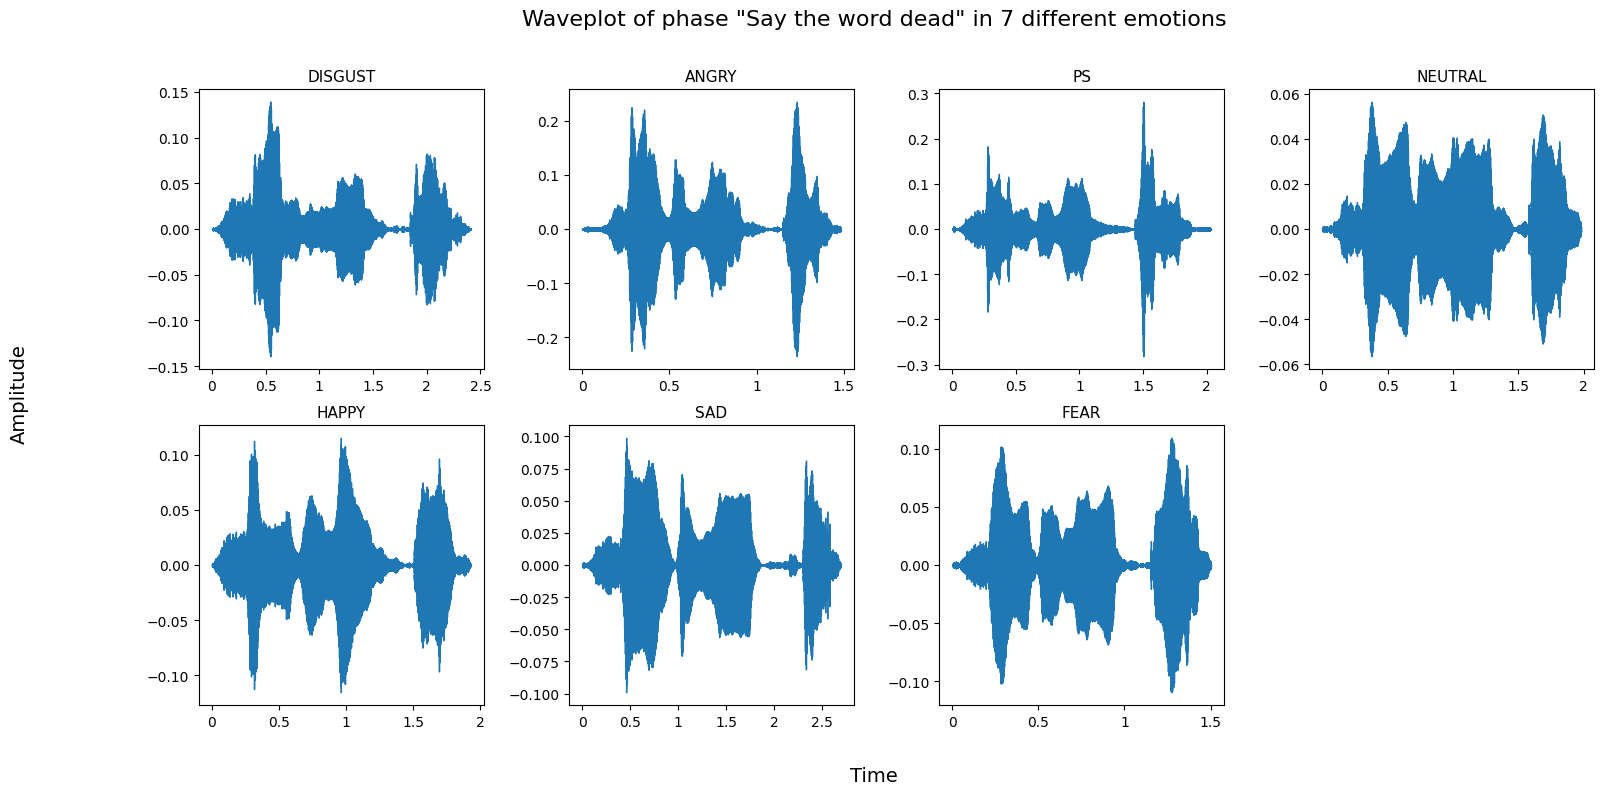

In [11]:
fig, axs = plt.subplots(2, 4, figsize=(18, 8))
fig.subplots_adjust(hspace = 0.2, wspace=.3)
fig.suptitle('Waveplot of phase "Say the word dead" in 7 different emotions', fontsize=16)
fig.supxlabel('Time', fontsize=14)
fig.supylabel('Amplitude', fontsize=14)
axs = axs.ravel()

for i in range(len(emotion_classes)):
    random_row = df.query(f'word == "dead" and age == "old" and emotion == "{emotion_classes[i]}"').sample(1)
    data, sr = librosa.load(random_row.file.values[0], sr=None)

    axs[i].set_title(emotion_classes[i].upper(), fontsize=11)
    librosa.display.waveshow(data, sr=sr, ax=axs[i])
    axs[i].set_xlabel("")

axs[-1].axis('off')
plt.show()

#### Spectrograms

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. In other words, a spectrogram graph displays the frequency content of a signal over time. The spectrogram graph is generated by performing a mathematical operation called a Fourier transform on a time-domain signal, which converts the signal from the time domain to the frequency domain. The resulting frequency domain signal is then divided into small segments, and the spectrum of each segment is calculated using a mathematical technique called the short-time Fourier transform. These spectra are then plotted over time to create the spectrogram graph. Librosa provides `librosa.stft()` function to perform the Fourier transform on a time-domain signal. The `librosa.stft()` function takes the audio signal as input, and it returns a two-dimensional array containing the spectrogram. We convert the data into dB scale for convenience. Then we use the `librosa.display.specshow()` function to plot the spectrogram.

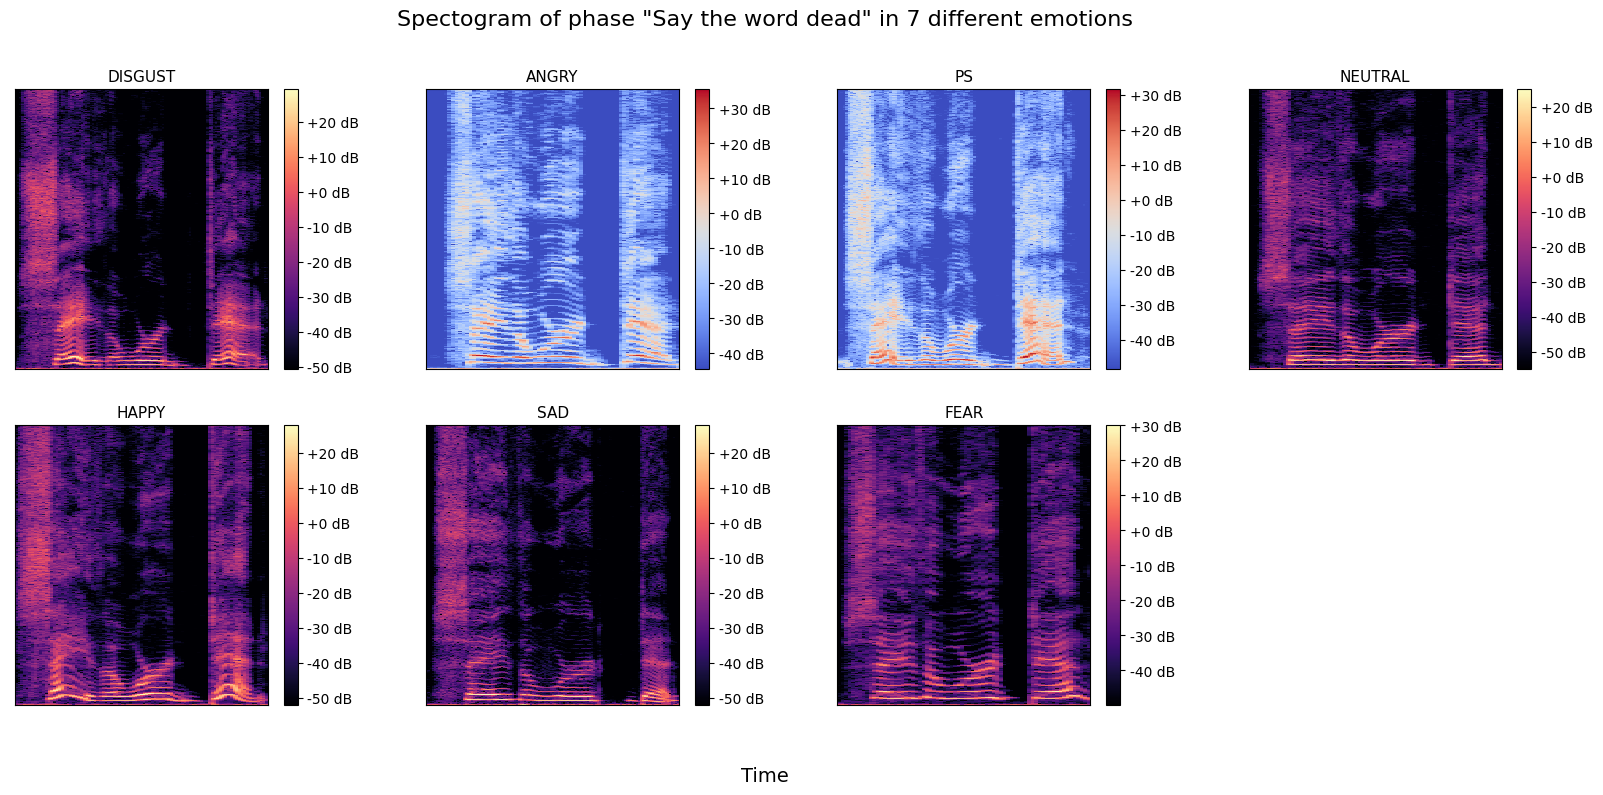

In [12]:
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
fig.subplots_adjust(hspace = 0.2, wspace=.3)
fig.suptitle('Spectogram of phase "Say the word dead" in 7 different emotions', fontsize=16)
fig.supxlabel('Time', fontsize=14)
axs = axs.ravel()

for i in range(len(emotion_classes)):
    random_row = df.query(f'word == "dead" and age == "old" and emotion == "{emotion_classes[i]}"').sample(1)
    data, sr = librosa.load(random_row.file.values[0], sr=None)

    axs[i].set_title(emotion_classes[i].upper(), fontsize=11)
    axs[i].set_xlabel("")

    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    img = librosa.display.specshow(xdb, sr=sr, ax=axs[i])
    plt.colorbar(img, format='%+2.0f dB', ax=axs[i])

axs[-1].axis('off')
plt.show()

#### Chromagrams

A chromagram is a type of visual representation that displays the pitch content of an audio signal. Similar to a spectrogram, a chromagram is a two-dimensional representation of the frequency content of a signal over time, but whereas a spectrogram displays the intensity of different frequencies, a chromagram displays the relative intensity of different pitches or musical notes. Librosa provides `librosa.feature.chroma_stft()` function to convert the spectrogram into a chromagram.

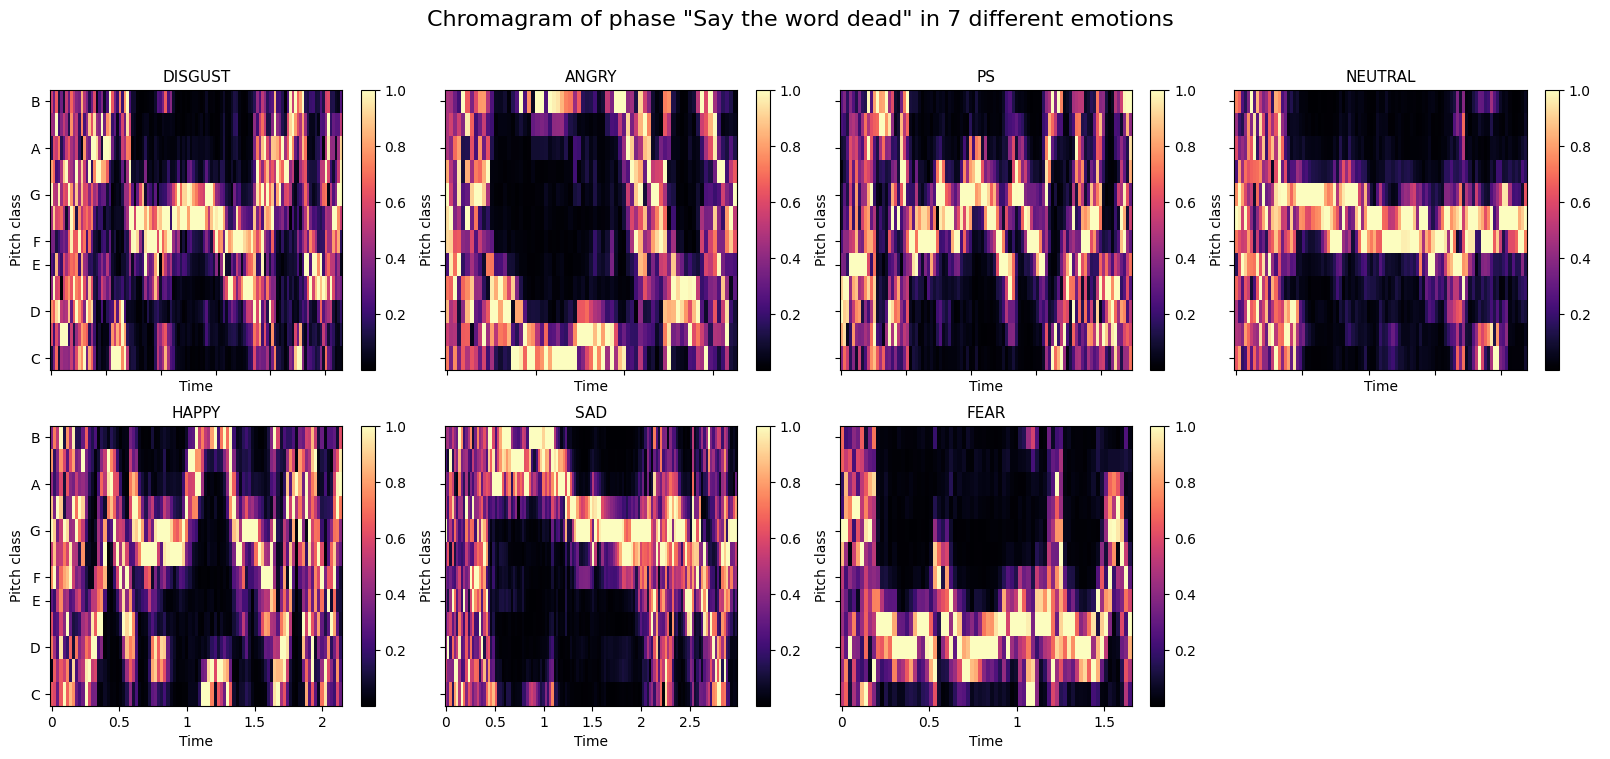

In [13]:
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
fig.subplots_adjust(hspace = 0.2, wspace=.08)
fig.suptitle('Chromagram of phase "Say the word dead" in 7 different emotions', fontsize=16)
axs = axs.ravel()

for i in range(len(emotion_classes)):
    random_row = df.query(f'word == "dead" and age == "old" and emotion == "{emotion_classes[i]}"').sample(1)
    data, sr = librosa.load(random_row.file.values[0], sr=None)

    axs[i].set_title(emotion_classes[i].upper(), fontsize=11)
    axs[i].set_xlabel("")
    axs[i].label_outer()

    x = librosa.stft(data)
    chroma = librosa.feature.chroma_stft(S=x, sr=sr)
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=axs[i], hop_length=512)
    plt.colorbar(img, ax=axs[i])

axs[-1].axis('off')
plt.show()

#### MFCC

MFCC stands for Mel Frequency Cepstral Coefficients. It is a widely used feature extraction technique in audio and speech signal processing, which is used to represent the spectral characteristics of a signal.

The MFCC technique involves a series of mathematical operations that are applied to the frequency spectrum of an audio signal. First, the audio signal is divided into short frames, and the spectrum of each frame is calculated using the Fourier transform. Next, the spectrum is transformed using a filterbank that mimics the human auditory system's sensitivity to different frequencies. This filterbank is designed to have triangular filters that are spaced uniformly on a mel scale, which is a scale that approximates the perceptual distance between different frequencies in human hearing.

We use the `librosa.feature.mfcc()` function to convert the time-domain waveplot into a MFCC plot.

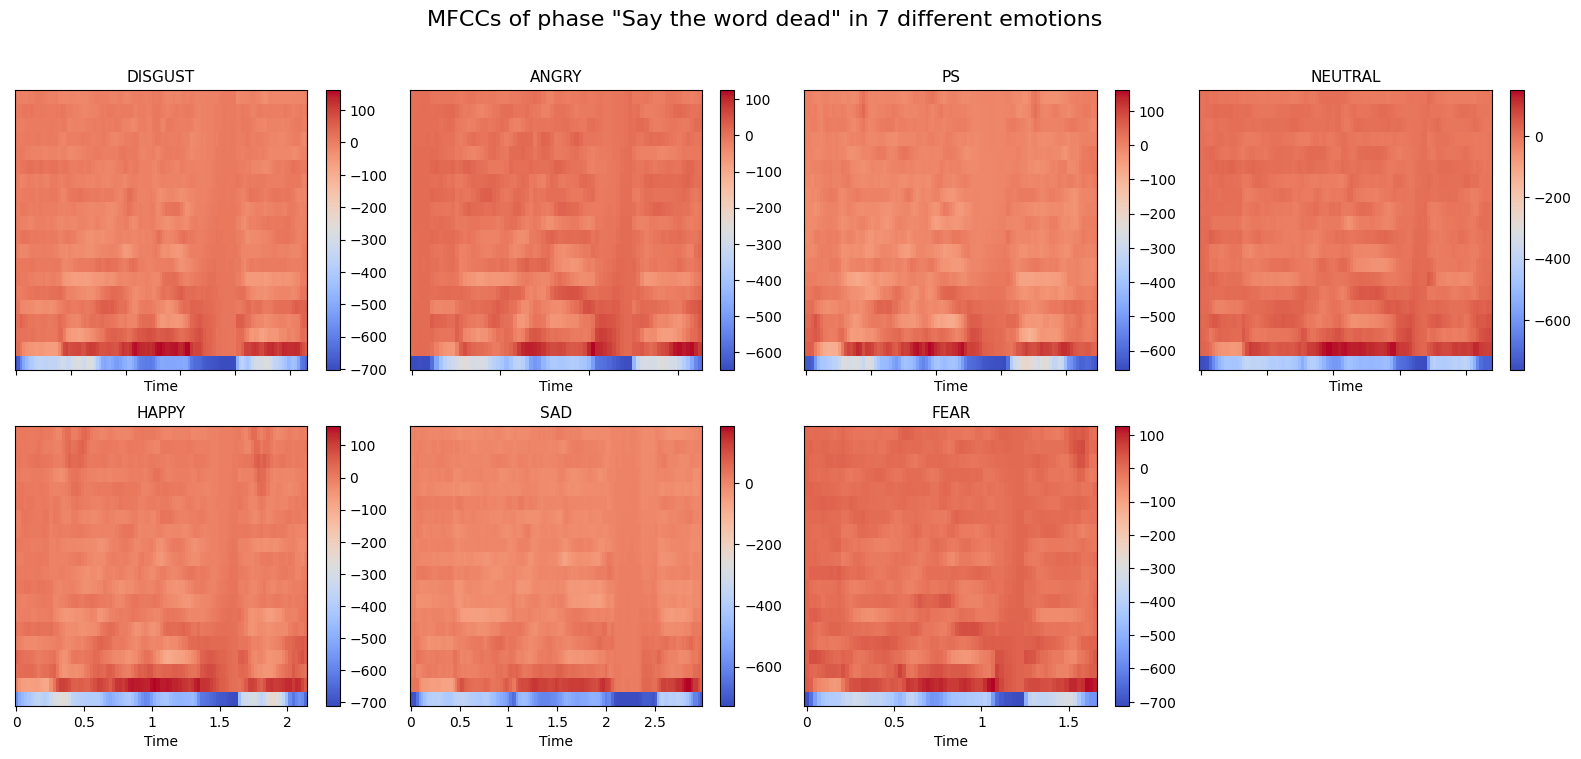

In [14]:
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
fig.subplots_adjust(hspace = 0.2, wspace=.08)
fig.suptitle('MFCCs of phase "Say the word dead" in 7 different emotions', fontsize=16)
axs = axs.ravel()

for i in range(len(emotion_classes)):
    random_row = df.query(f'word == "dead" and age == "old" and emotion == "{emotion_classes[i]}"').sample(1)
    data, sr = librosa.load(random_row.file.values[0], sr=None)

    axs[i].set_title(emotion_classes[i].upper(), fontsize=11)
    axs[i].set_xlabel("")
    axs[i].label_outer()

    mfcc = librosa.feature.mfcc(data, sr=sr)
    img = librosa.display.specshow(mfcc, x_axis='time', ax=axs[i], hop_length=512)
    plt.colorbar(img, ax=axs[i])

axs[-1].axis('off')
plt.show()

#### Mel Spectrogram

A mel spectrogram is a type of visual representation that displays the frequency content of an audio signal in a way that approximates the human perception of sound. It is similar to a standard spectrogram, but the frequency axis is scaled according to the mel scale, which is a non-linear scale that better reflects the way humans perceive pitch.

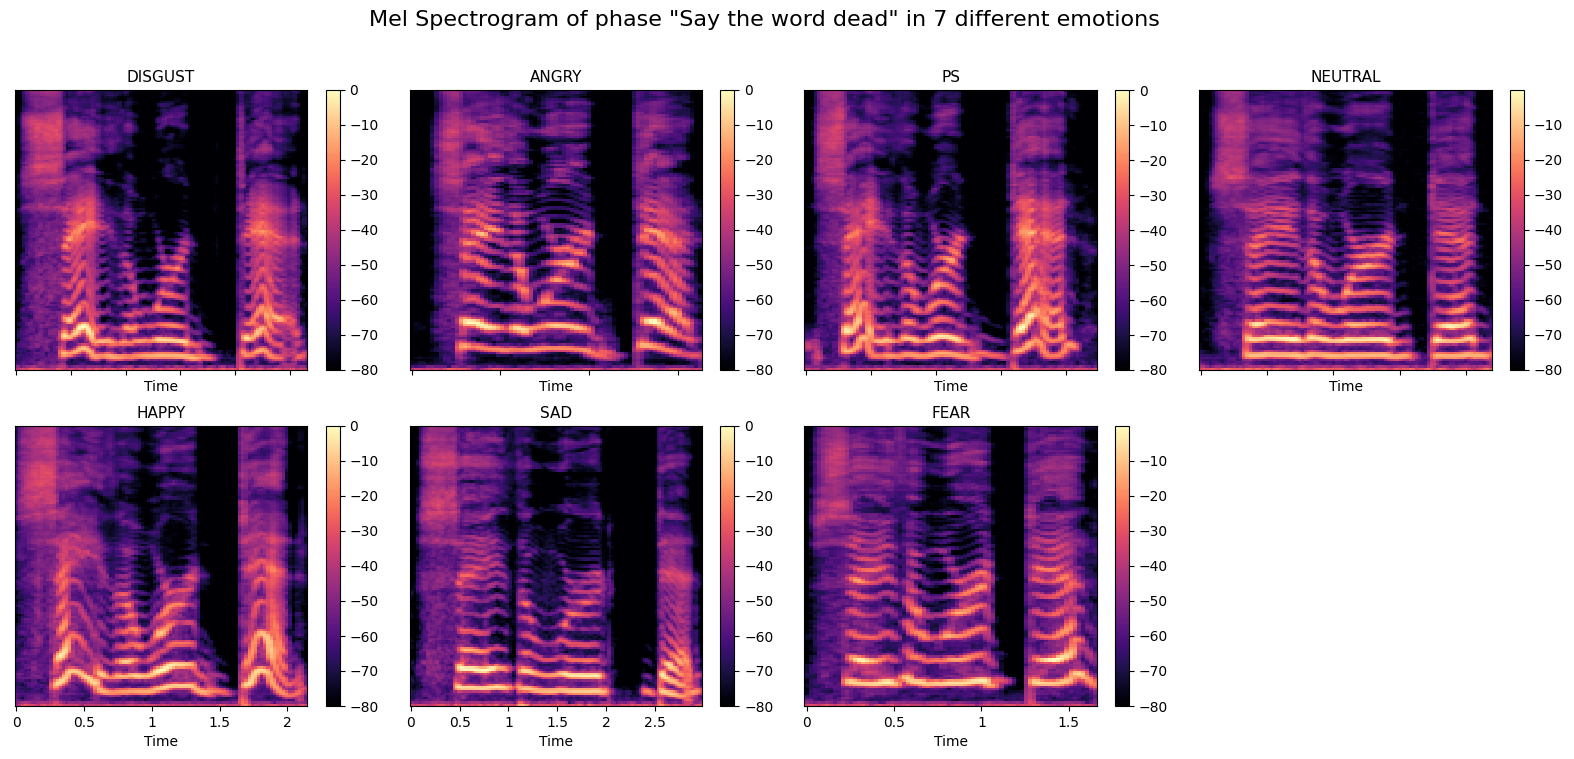

In [15]:
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
fig.subplots_adjust(hspace = 0.2, wspace=.08)
fig.suptitle('Mel Spectrogram of phase "Say the word dead" in 7 different emotions', fontsize=16)
axs = axs.ravel()

for i in range(len(emotion_classes)):
    random_row = df.query(f'word == "dead" and age == "old" and emotion == "{emotion_classes[i]}"').sample(1)
    data, sr = librosa.load(random_row.file.values[0], sr=None)

    axs[i].set_title(emotion_classes[i].upper(), fontsize=11)
    axs[i].set_xlabel("")
    axs[i].label_outer()

    mel = librosa.feature.melspectrogram(data, sr=sr)
    img = librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), x_axis='time', ax=axs[i], hop_length=512)
    plt.colorbar(img, ax=axs[i])

axs[-1].axis('off')
plt.show()

### Feature Extraction

We extract the following features from every audio files:

- Mean of the MFCC
- Mean of the chromagram
- Mean of the mel-scaled spectrogram

Then we concatenate all the features into a single numpy array and return it.

In [16]:
def extract_feature(file_name):
    
    y, sr = librosa.load(file_name, res_type='kaiser_fast', sr=None)

    result = np.array([])
    
    stft = np.abs(librosa.stft(y))
    chromas = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    result = np.hstack((result, chromas))

    mfccs=np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfccs))

    mels = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128).T, axis=0)
    result = np.hstack((result, mels))
        
    return result
    

We separate the features and labels from the dataset.

In [17]:
y = df.drop('emotion', axis=1)
y = df['emotion']
y.head()

0    disgust
1    disgust
2      angry
3      angry
4         ps
Name: emotion, dtype: object

We extract the features from each audio files and store them in a list. Then we convert the list into a numpy array.

In [18]:
X_features =[]

for x in tqdm(df['file']):
    X_features.append(extract_feature(x))
X_features = pd.DataFrame(X_features)

100%|██████████| 2800/2800 [01:36<00:00, 29.12it/s]


Since the feature extraction process is a time consuming process, we save the features and labels into a csv file. This way, we don't have to extract the features again and again.

In [19]:
#concatinating the attributes and label into a single dataframe
data = pd.concat([X_features, df['emotion']], axis =1)

In [ ]:
data.to_csv("TESS_FEATURES.csv", index=False)

In [93]:
data = pd.read_csv("./TESS_FEATURES.csv")
data

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,emotion
0,0.296550,0.294147,0.271991,0.281825,0.379901,0.658718,0.786027,0.472076,0.314608,0.299873,...,0.000089,0.000065,0.000041,0.000038,0.000043,0.000048,0.000063,0.000061,0.000082,neutral
1,0.363065,0.302937,0.323988,0.375003,0.470227,0.558919,0.476957,0.462192,0.430678,0.434191,...,0.000016,0.000011,0.000023,0.000027,0.000023,0.000014,0.000011,0.000010,0.000009,sad
2,0.399133,0.699073,0.359397,0.252036,0.299993,0.556920,0.915945,0.535985,0.276756,0.241247,...,0.000691,0.000377,0.000392,0.000652,0.000656,0.000479,0.000272,0.000144,0.000129,neutral
3,0.534744,0.778556,0.704274,0.452175,0.345300,0.336038,0.336155,0.344061,0.411610,0.403699,...,0.000678,0.000773,0.000556,0.000434,0.000366,0.000299,0.000275,0.000306,0.000370,fear
4,0.643707,0.580416,0.472991,0.516231,0.545832,0.527694,0.552593,0.506478,0.526697,0.557037,...,0.008955,0.008929,0.018470,0.044534,0.033964,0.020041,0.014699,0.017445,0.020340,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.507207,0.598812,0.636992,0.449197,0.344541,0.341602,0.351697,0.328170,0.312767,0.367280,...,0.000136,0.000118,0.000102,0.000065,0.000081,0.000101,0.000145,0.000159,0.000195,fear
2796,0.510263,0.590549,0.611150,0.449163,0.487465,0.468591,0.531410,0.434692,0.373946,0.384471,...,0.011937,0.008983,0.016662,0.040773,0.053621,0.029672,0.008240,0.011824,0.014004,happy
2797,0.598260,0.624131,0.610052,0.547368,0.455073,0.474646,0.551318,0.497735,0.421233,0.426849,...,0.032808,0.030267,0.058845,0.031472,0.022538,0.022417,0.014772,0.015696,0.020876,fear
2798,0.392553,0.401846,0.386481,0.375106,0.487134,0.554785,0.602164,0.573502,0.493655,0.441085,...,0.000841,0.000599,0.000286,0.000198,0.000227,0.000448,0.000806,0.001103,0.001728,ps


In [19]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

## Model Development

### Building a Model Training & Evaluation Pipeline

Before training multiple models, first let's build a single model. This will help us to understand the process of training and evaluating a model.

#### Importing sklearn libraries
We import all the necessary sklearn libraries. Their functions are discussed in the upcoming sections.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
import time

np.random.seed(42) # for reproducibility

#### Splitting the dataset into training and testing sets

We split the dataset into training and testing sets. We use 80% of the data for training and 20% for testing. We also stratify the data to ensure that the class distribution is the same in both the training and testing sets.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2240, 180), (560, 180), (2240,), (560,))

To ensure proper distribution of classes, we count all the instances and visualize them in a bar plot.

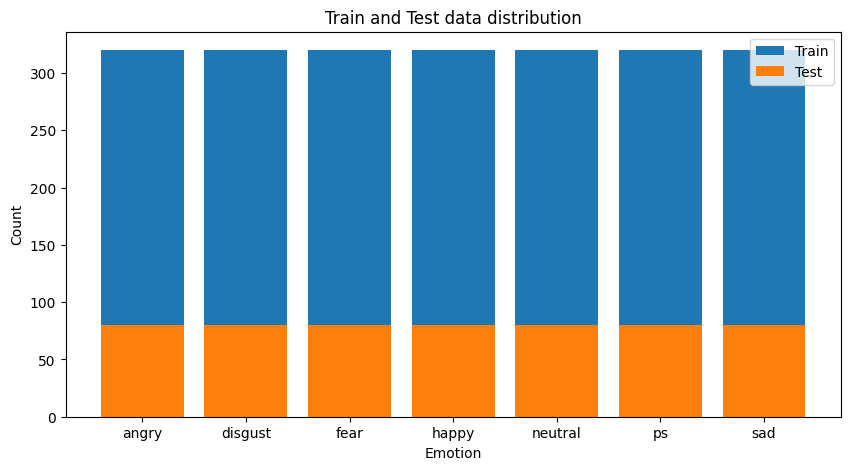

In [22]:
train_classes, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(train_classes, train_counts, label='Train')
ax.bar(train_classes, test_counts, label='Test')
ax.set_title('Train and Test data distribution')
ax.set_xlabel('Emotion')
ax.set_ylabel('Count')
ax.legend()
plt.show()

#### Source Vector Machine (SVM) with Radial Basis Function (RBF) Kernel

SVM is a supervised machine learning algorithm that can be used for classification or regression tasks. The basic idea behind SVM is to find the hyperplane that best separates the data into different classes. The hyperplane is chosen so that it maximizes the margin between the two classes, i.e., the distance between the hyperplane and the nearest data points of each class. The data points that lie closest to the hyperplane are called support vectors, and they define the hyperplane.

In cases where the data is not linearly separable, SVM uses a technique called kernel trick to map the data into a higher-dimensional space, where it becomes linearly separable. SVM RBF, or Support Vector Machine with Radial Basis Function kernel, is a popular variation of the SVM algorithm that uses a non-linear kernel function to perform classification or regression tasks. RBF kernel is a type of Gaussian kernel, which means it measures the similarity between two data points based on their distance in a Gaussian distribution.

In [23]:
from sklearn.svm import SVC

Scaling is a data preprocessing technique used in machine learning to standardize the scale of the input features. `StandardScaler()` transforms the input features to have zero mean and unit variance, by subtracting the mean of the feature and dividing by the standard deviation.

$$x_{scaled} = \frac{x - \mu}{\sigma}$$

The purpose of standardization is to ensure that all input features are on a similar scale, which can be important for many machine learning algorithms. Some algorithms, such as logistic regression or support vector machines, are sensitive to the scale of the input features and can perform poorly if the features have different scales.

In [24]:
steps = [('scaler', StandardScaler()),
        ('SVM', SVC(kernel = 'rbf'))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svm_rbf = pipeline.fit(X_train, y_train)

##### Generalization check
In machine learning, model generalization refers to the ability of a trained model to perform well on unseen data, i.e., data that the model has not been trained on. The goal of model generalization is to create a model that can accurately make predictions on new data, rather than simply memorizing the data it has been trained on.

In [25]:
train_acc = float(svm_rbf.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svm_rbf.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 99.91071428571429 ----
----test accuracy score 98.21428571428571 ----


In [26]:
scaled_predictions = svm_rbf.predict(X_test)

##### Classification reports and Confusion Matrix
A classification report and a confusion matrix are two important tools used to evaluate the performance of a classification model.

A confusion matrix is a table that summarizes the performance of a classification model by showing the number of correct and incorrect predictions made by the model on a set of test data. A classification report, on the other hand, provides a more detailed summary of the performance of a classification model. It includes several metrics that can be used to evaluate the performance of the model, such as precision, recall, F1-score, and support.

              precision    recall  f1-score   support

       angry       0.99      1.00      0.99        80
     disgust       0.98      1.00      0.99        80
        fear       0.96      0.95      0.96        80
       happy       0.95      1.00      0.98        80
     neutral       1.00      1.00      1.00        80
          ps       1.00      0.93      0.96        80
         sad       1.00      1.00      1.00        80

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560

----accuracy score 98.21428571428571 ----


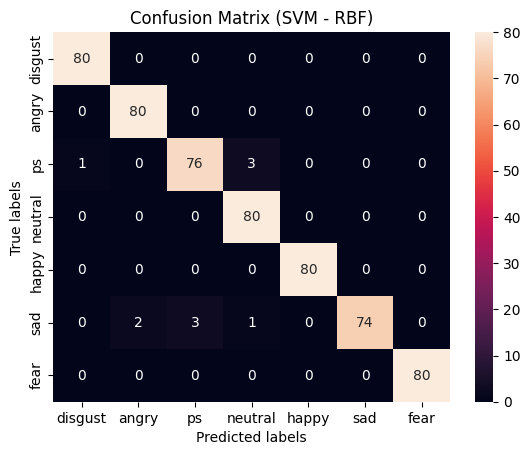

In [27]:
print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix (SVM - RBF)'); 
ax.xaxis.set_ticklabels(emotion_classes);
ax.yaxis.set_ticklabels(emotion_classes);

##### Cross Validation

Cross-validation is a technique used to evaluate the performance of a machine learning model by testing it on multiple subsets of the available data. The purpose of cross-validation is to assess how well a model can generalize to new, unseen data. We use `RepeatedStratifiedKFold` to perform cross-validation where data is split into "folds" with similar ratio of class in each fold. The folds are then repeated multiple times to ensure that each fold is used as both training and testing data. After each fold is used as testing data, we repeat the whole process again.

In [28]:
# 5 splits ->  80% train, 20% test
# 10 repeats ->  Repeat KFold process 10 times

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

The accuracy obtained from cross-validation is more reliable than the accuracy obtained from a single train-test split. This is because the model is trained and evaluated multiple times on different subsets of the data, and the average accuracy is calculated. This way, we can get a better idea of how well the model will perform on unseen data.

In [29]:
cv_results2 = cross_validate(pipeline, X, y, cv=cv, n_jobs=-1, scoring='accuracy')
print("5-fold CV mean accuracy:", np.mean(cv_results2['test_score']))

5-fold CV mean accuracy: 0.9866071428571429


### Creating Helper Functions

In the previous sections, we have built a single model and evaluated its performance. Now, we will create functions that will train and evaluate multiple models. This will help us to compare the performance of different models.

In [30]:
def get_data():
    data = pd.read_csv("./TESS_FEATURES.csv")
    X = data.drop('emotion', axis = 1).values
    y = data['emotion'].values
    return X, y

In [31]:
X, y = get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2240, 180), (560, 180), (2240,), (560,))

In [33]:
def train_and_test_models(models):
    results = []

    global X_train, X_test, y_train, y_test

    for name, model in models.items():

        print()
        print('=' * 30)
        print(f"Training {name} model...")

        scores = cross_validate(model, X_train, y_train, cv=cv, n_jobs=-1, return_train_score=True, scoring='accuracy', return_estimator=True)

        idx = np.argmax(scores['test_score'])

        model = scores['estimator'][idx]

        start = time.time()
        y_pred = model.predict(X_test)
        end = time.time()


        print(f"Done training {name}")
        print('=' * 30)

        results.append({
            'name': name,
            'train_score': scores['train_score'].mean() * 100.0,
            'test_score': scores['test_score'].mean() * 100.0,
            'fit_time': scores['fit_time'].mean(),
            'inference_time': end - start,
            'accuracy': accuracy_score(y_test, y_pred) * 100.0,
            'confusion_matrix': confusion_matrix(y_test, y_pred, labels=emotion_classes),
            'classification_report': classification_report(y_test, y_pred),
            'model': model,
        })
    
    return results

### Machine Learning Models

We will train and evaluate the following traditional machine learning models:

- Logistic Regression
- Naive Bayes
- Decision Tree
- Random Forest
- K-Nearest Neighbors

We also look at Multi-Layer Perceptron (MLP).

#### Importing all The Models

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

We initialize all the models and store them in a dictionary.

In [67]:
models = {

    'SVM RBF': Pipeline([
        ('scaler', StandardScaler()),
        ('SVM', SVC(kernel = 'rbf'))
    ]),

    'Random Forest': RandomForestClassifier(n_estimators=100),

    'Naive Bayes': GaussianNB(),

    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('KNN', KNeighborsClassifier())
    ]),

    'Decision Tree': DecisionTreeClassifier(max_depth=50),

    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('Logistic Regression', LogisticRegression())
    ]),

    'MLP': MLPClassifier()

}

Finally, we train and evaluate all the models and get the results.

In [68]:
results = train_and_test_models(models)


Training SVM RBF model...
Done training SVM RBF

Training Random Forest model...
Done training Random Forest

Training Naive Bayes model...
Done training Naive Bayes

Training KNN model...
Done training KNN

Training Decision Tree model...
Done training Decision Tree

Training Logistic Regression model...
Done training Logistic Regression

Training MLP model...
Done training MLP


#### Employing Grid Searching to tune the hyperparameters of MLP

MLP stands for Multilayer Perceptron, which is a type of artificial neural network used in machine learning. It is a feedforward neural network model, meaning that the information flows in only one direction through the network, from input to output. An MLP consists of multiple layers of interconnected nodes, or "neurons", that process the input data. The first layer is the input layer, which receives the input data. The last layer is the output layer, which produces the output of the model. The layers in between are called hidden layers, and they perform computations on the input data.

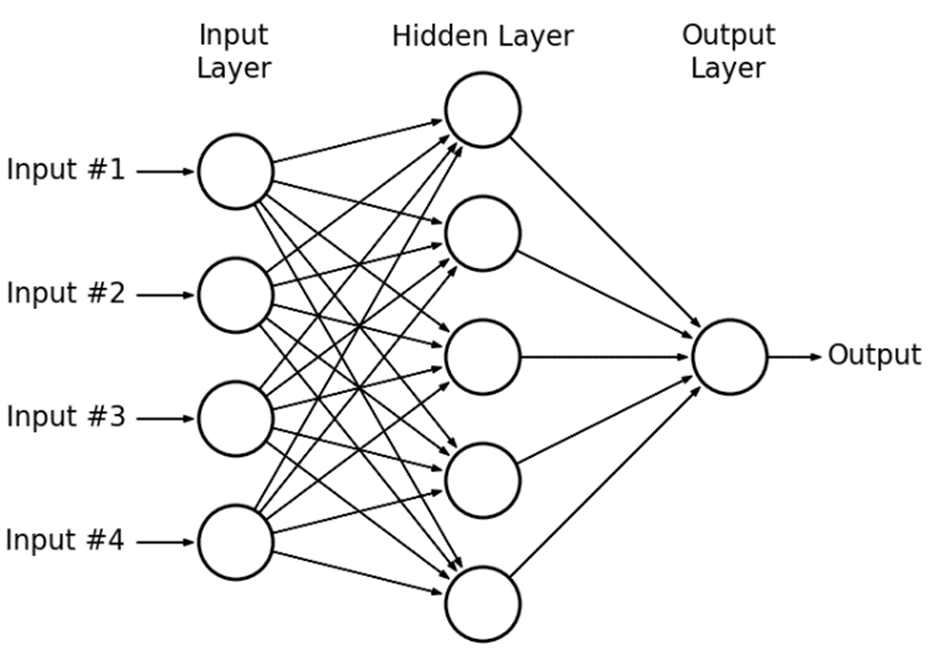

Grid searching is a process of hyperparameter tuning in machine learning that involves searching for the optimal combination of hyperparameters for a given model. Hyperparameters are parameters that are not learned from the data during training, but rather set by the user before training the model. Grid searching involves defining a grid of possible hyperparameter values and then evaluating the performance of the model for each combination of hyperparameters on a validation set. The hyperparameters that result in the best model performance are then chosen as the optimal hyperparameters for the given model. We will use grid searching to find the optimal hyperparameters for our MLP model.

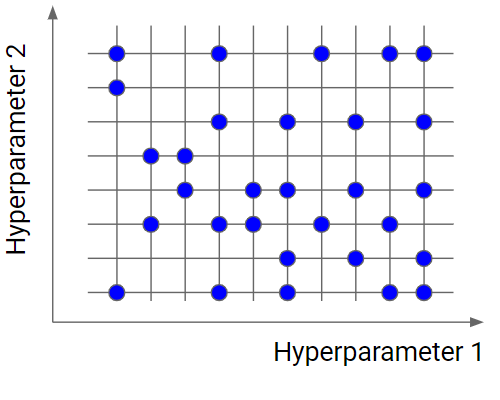

In [69]:
mlp = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(25,), (50,), (100,), (150,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.0001],
    'learning_rate_init': [0.001, 0.0001],
    'learning_rate': ['constant', 'adaptive'],
}

cv2 = StratifiedKFold(n_splits=5)

mlp_clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=cv2, return_train_score=True)

In [70]:
mlp_clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.001, 0.0001],
                         'hidden_layer_sizes': [(25,), (50,), (100,), (150,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.0001],
                         'solver': ['sgd', 'adam']},
             return_train_score=True)

These are the best hyperparameters found by grid searching

In [71]:
mlp_clf.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (150,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'solver': 'adam'}

Let's add the results of the MLP model to the `results` dictionary.

In [72]:
start = time.time()
y_pred_mlp_grid = mlp_clf.predict(X_test)
end = time.time()

results.append({
    'name': 'MLP (GridSearch)',
    'train_score': mlp_clf.cv_results_['mean_train_score'][mlp_clf.best_index_] * 100.0,
    'test_score': mlp_clf.best_score_ * 100.0,
    'fit_time': mlp_clf.cv_results_['mean_fit_time'][mlp_clf.best_index_],
    'inference_time': end - start,
    'accuracy': accuracy_score(y_test, y_pred_mlp_grid) * 100.0,
    'confusion_matrix': confusion_matrix(y_test, y_pred_mlp_grid, labels=emotion_classes),
    'classification_report': classification_report(y_test, y_pred_mlp_grid),
    'model': mlp_clf.best_estimator_,
})

## Discussion & Conclusion

### Comparison of the models

In [73]:
cv_scores = {
    'name': [],
    'train_accuracy': [],
    'test_accuracy': [],
    'train_time': [],
    'inference_time': []
}

for res in results:
    cv_scores['name'].append(res['name'])
    cv_scores['train_accuracy'].append(res['train_score'])
    cv_scores['test_accuracy'].append(res['accuracy'])
    cv_scores['train_time'].append(res['fit_time'])
    cv_scores['inference_time'].append(res['inference_time'])

df_cv = pd.DataFrame(cv_scores)


# Converting to milliseconds
df_cv['train_time'] = df_cv['train_time'] * 1000
df_cv['inference_time'] = df_cv['inference_time'] * 1000

df_cv

,name,train_accuracy,test_accuracy,train_time,inference_time
0,SVM RBF,99.820312,98.928571,378.930950,79.059362
1,Random Forest,100.000000,99.642857,2458.302960,16.558170
2,Naive Bayes,81.683036,81.964286,28.249335,1.995087
3,KNN,99.270089,99.285714,21.594038,59.479713
4,Decision Tree,100.000000,92.678571,543.479743,0.997066
5,Logistic Regression,100.000000,99.285714,531.638017,0.985384
6,MLP,100.000000,99.642857,4578.539915,1.958609
7,MLP (GridSearch),100.000000,99.821429,5750.803137,5.012035


#### Comparison of the Models Based on Test Accuracy

Test accuracy is the percentage of correctly predicted labels out of all the labels in the test set. It is a measure of how well the model performs on the test set. The higher the test accuracy, the better the model performs on the test set.

Text(0.5, 1.0, 'Comparison Between Different Algorithms Based on Test Accuracy (5-Fold Repeated CV Mean Test Accuracy)')

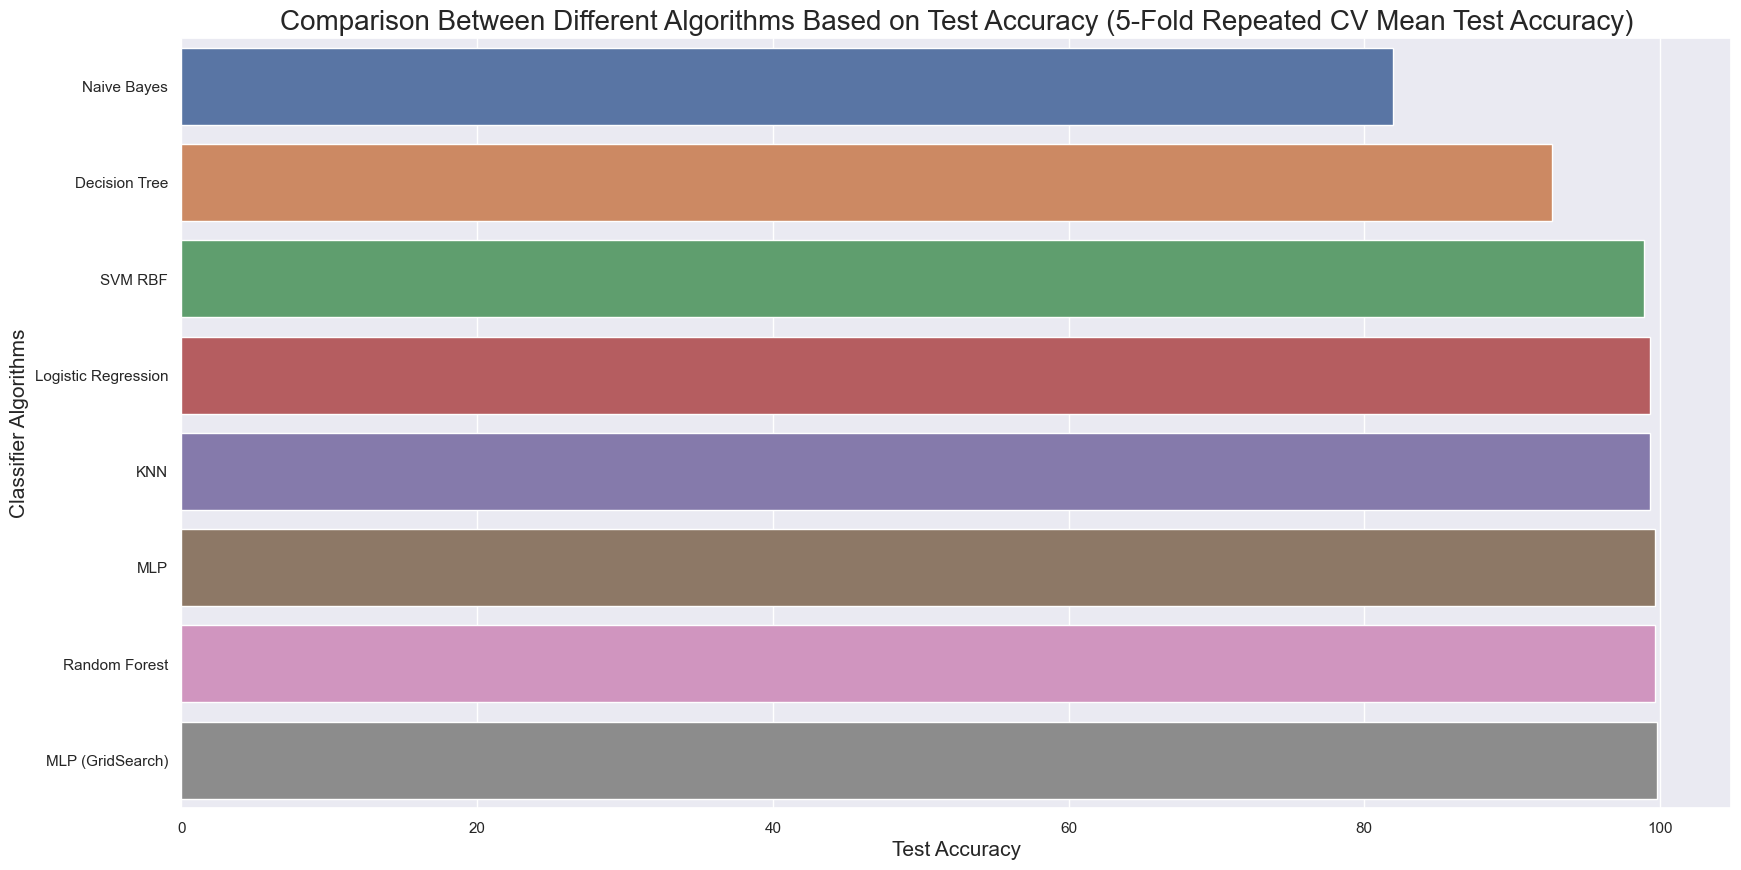

In [81]:
sns.set_theme(style='darkgrid')

df_cv = df_cv.sort_values(by='test_accuracy', ascending=True)

plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_cv, x='test_accuracy', y='name')

ax.set_ylabel('Classifier Algorithms', fontsize=15)
ax.set_xlabel('Test Accuracy', fontsize=15)
ax.set_title('Comparison Between Different Algorithms Based on Test Accuracy (5-Fold Repeated CV Mean Test Accuracy)', fontsize = 20)

#### Comparison of the Models Based on the Time Taken to Train the Model

The time taken to train the model is the time taken to fit the model to the training data. It is a measure of how long it takes to train the model. The lower the time taken to train the model, the faster the model trains.

Text(0.5, 1.0, 'Comparison Between Different Algorithms Based on Train Time (The lower the better)')

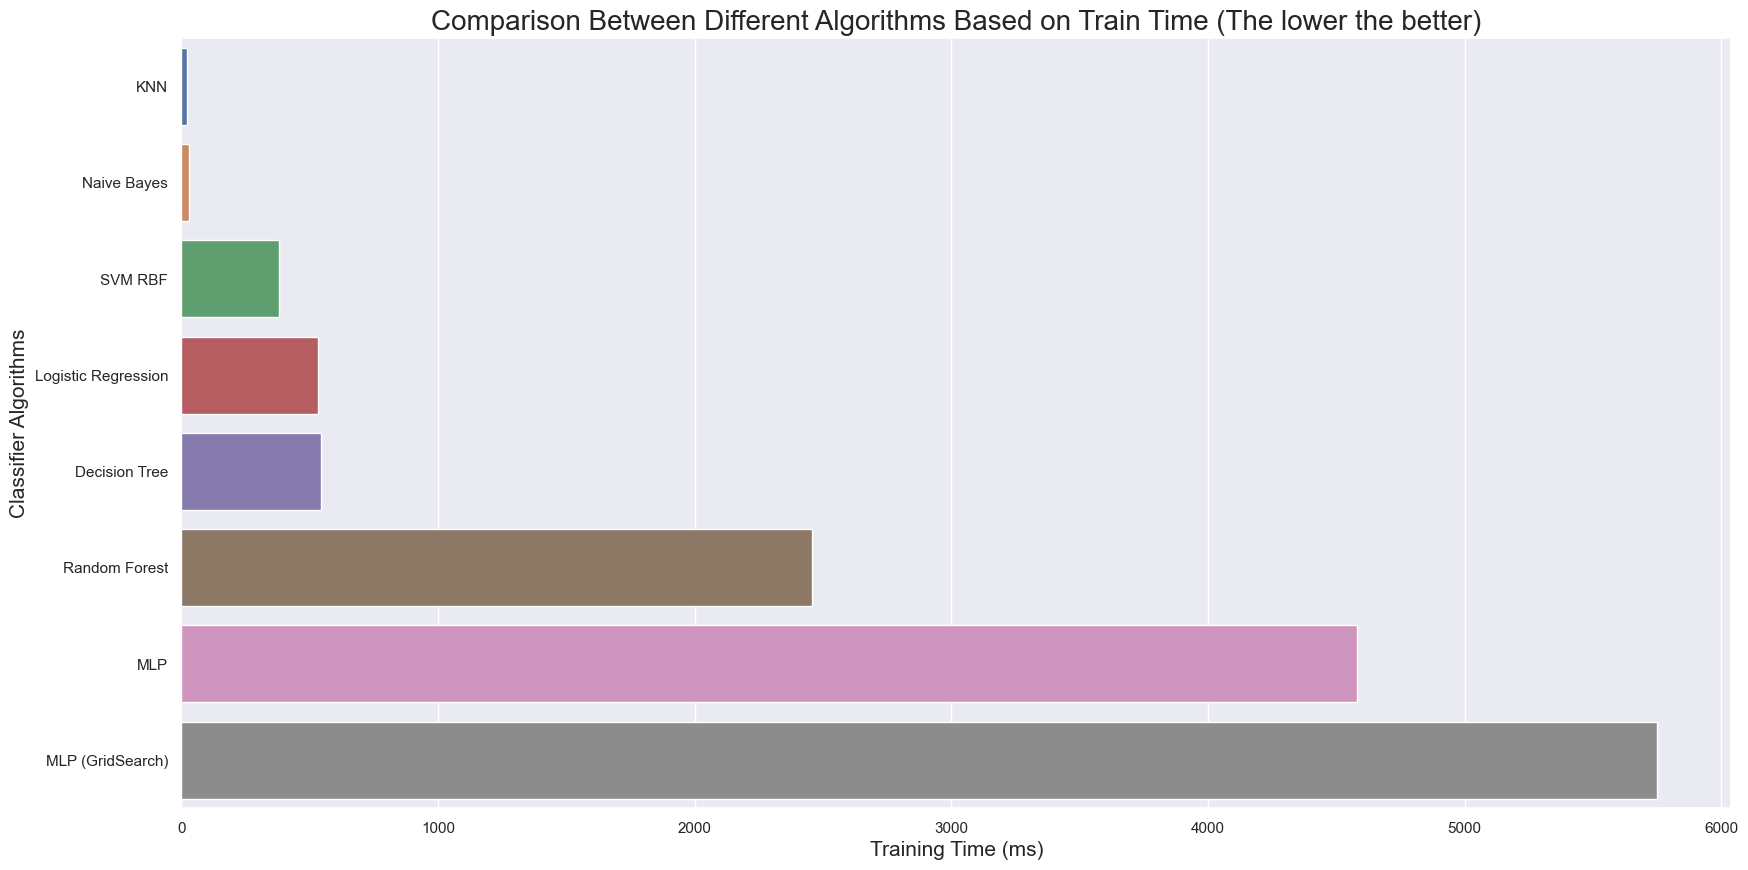

In [90]:
sns.set_theme(style='darkgrid')

df_cv = df_cv.sort_values(by='train_time', ascending=True)

plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_cv, x='train_time', y='name')

ax.set_ylabel('Classifier Algorithms', fontsize=15)
ax.set_xlabel('Training Time (ms)', fontsize=15)
ax.set_title('Comparison Between Different Algorithms Based on Train Time (The lower the better)', fontsize = 20)

#### Comparison of the Models Based on the Accuracy Gained per Millisecond of Training Time

The higher the accuracy gained per millisecond of training time, the more economocally viable the model is.

Text(0.5, 1.0, 'Comparison Between Different Algorithms Based on Accuracy vs Train Time Ratio (The higher the better)')

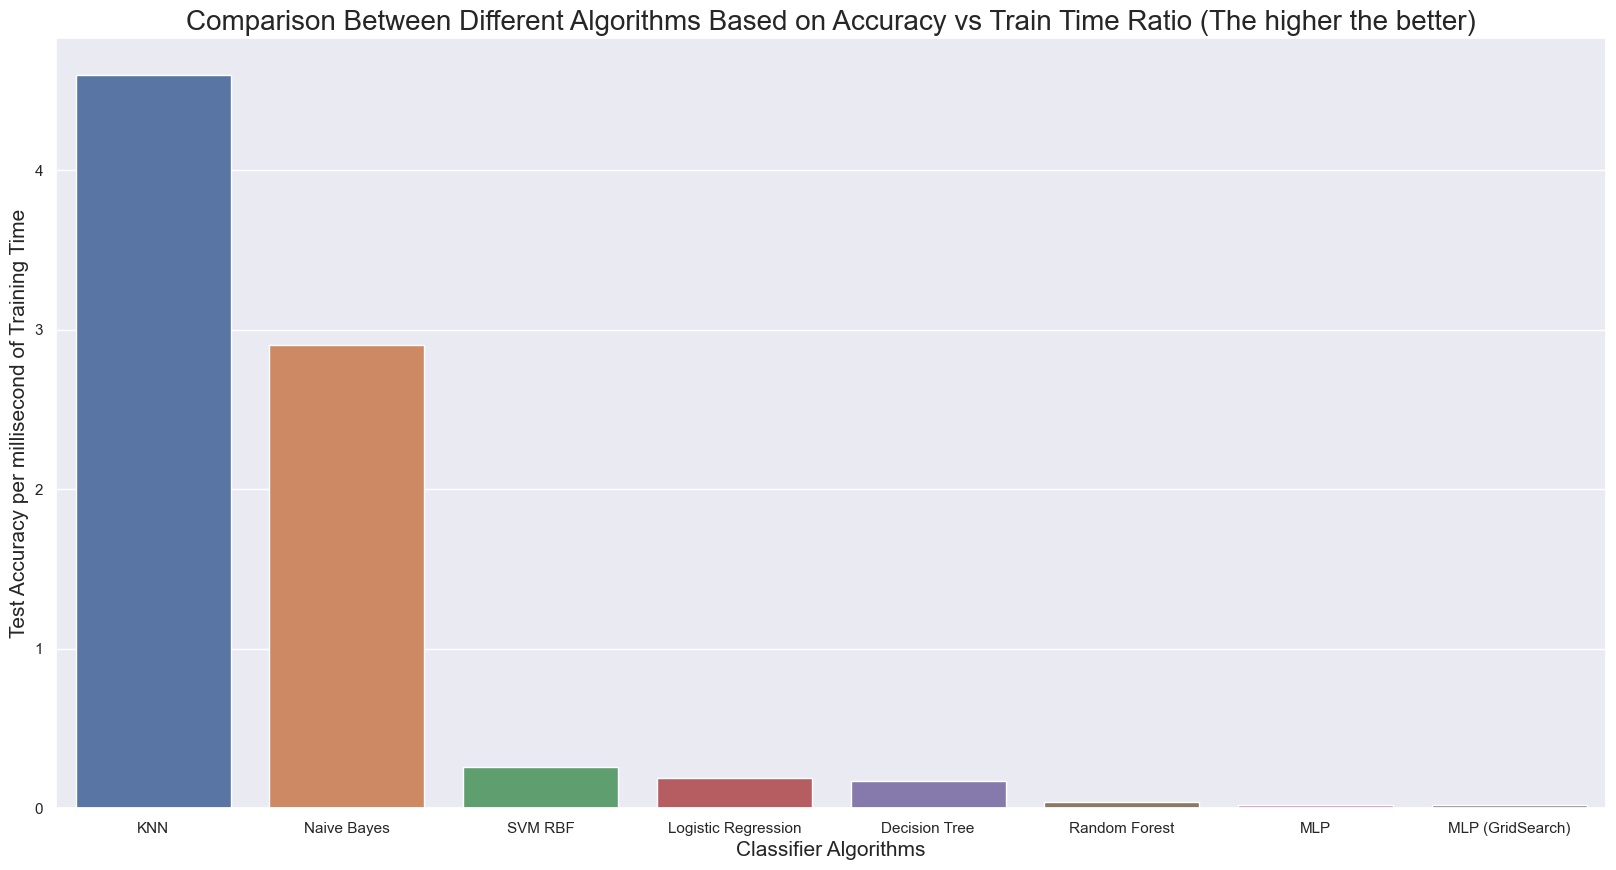

In [91]:
df_cv['accuracy_train_time_ratio'] = df_cv['test_accuracy'] / df_cv['train_time']

df_cv = df_cv.sort_values(by='accuracy_train_time_ratio', ascending=False)

sns.set_theme(style='darkgrid')

plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_cv, y='accuracy_train_time_ratio', x='name')

ax.set_xlabel('Classifier Algorithms', fontsize=15)
ax.set_ylabel('Test Accuracy per millisecond of Training Time', fontsize=15)
ax.set_title('Comparison Between Different Algorithms Based on Accuracy vs Train Time Ratio (The higher the better)', fontsize = 20)

#### Comparison of the Models Based on the Time Taken to Make Predictions

The lower the time, the faster the model makes predictions.

Text(0.5, 1.0, 'Comparison Between Different Algorithms Based on Inference Time (The lower the better)')

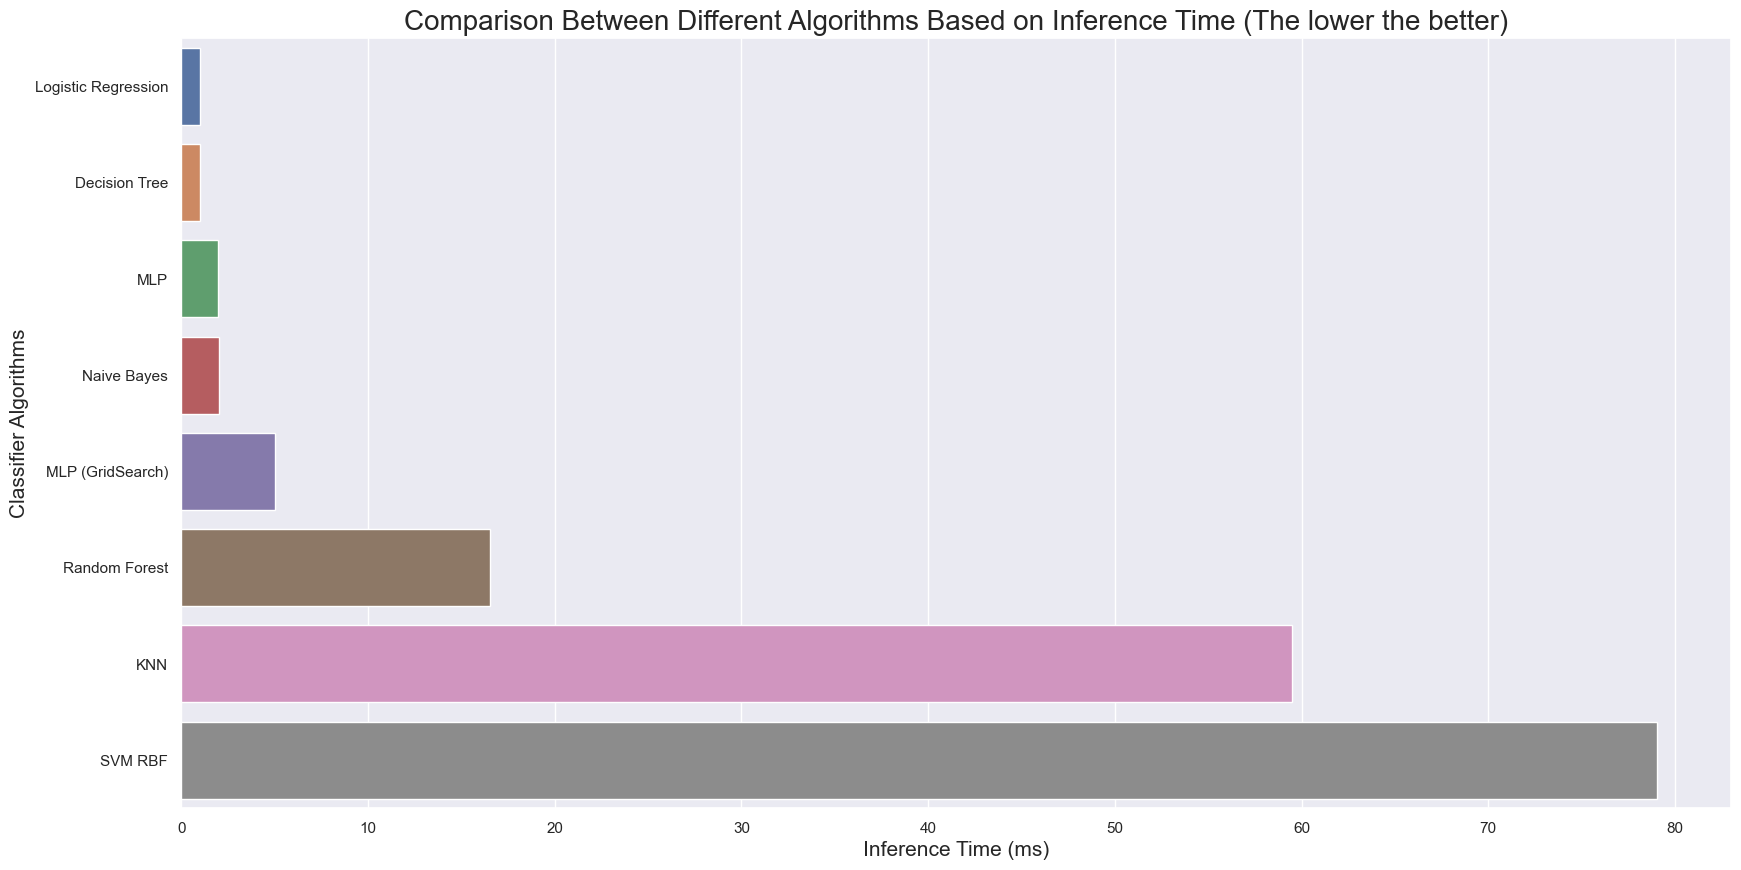

In [92]:
sns.set_theme(style='darkgrid')

df_cv = df_cv.sort_values(by='inference_time', ascending=True)

plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_cv, x='inference_time', y='name')

ax.set_ylabel('Classifier Algorithms', fontsize=15)
ax.set_xlabel('Inference Time (ms)', fontsize=15)
ax.set_title('Comparison Between Different Algorithms Based on Inference Time (The lower the better)', fontsize = 20)

#### Comparison of the Models Based on the Accuracy Gained per Millisecond of Prediction Time

The higher the score, the model is more viable to be used in real-time applications.

Text(0.5, 1.0, 'Comparison Between Different Algorithms Based on Accuracy vs Inference Time Ratio (The higher the better)')

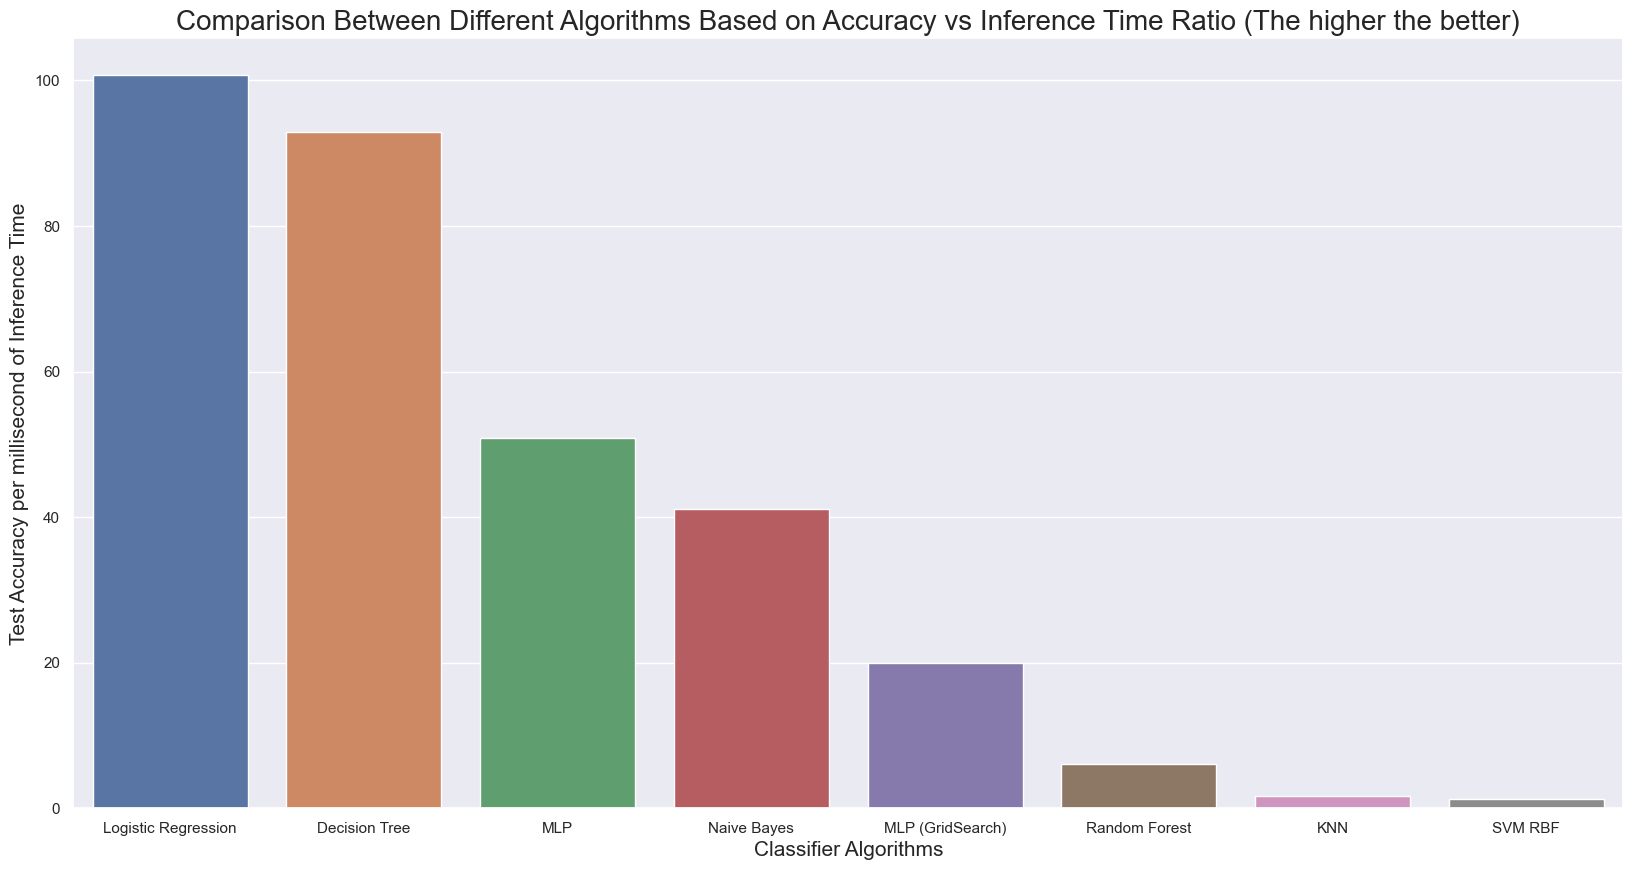

In [87]:
df_cv['accuracy_inf_time_ratio'] = df_cv['test_accuracy'] / df_cv['inference_time']

df_cv = df_cv.sort_values(by='accuracy_inf_time_ratio', ascending=False)

sns.set_theme(style='darkgrid')

plt.figure(figsize=(20,10))
ax = sns.barplot(data=df_cv, y='accuracy_inf_time_ratio', x='name')

ax.set_xlabel('Classifier Algorithms', fontsize=15)
ax.set_ylabel('Test Accuracy per millisecond of Inference Time', fontsize=15)
ax.set_title('Comparison Between Different Algorithms Based on Accuracy vs Inference Time Ratio (The higher the better)', fontsize = 20)

#### Comparison of the Models Based on Train Accuracy and Test Accuracy

The higher the difference between train accuracy and test accuracy, the more the model is overfitting.

[]

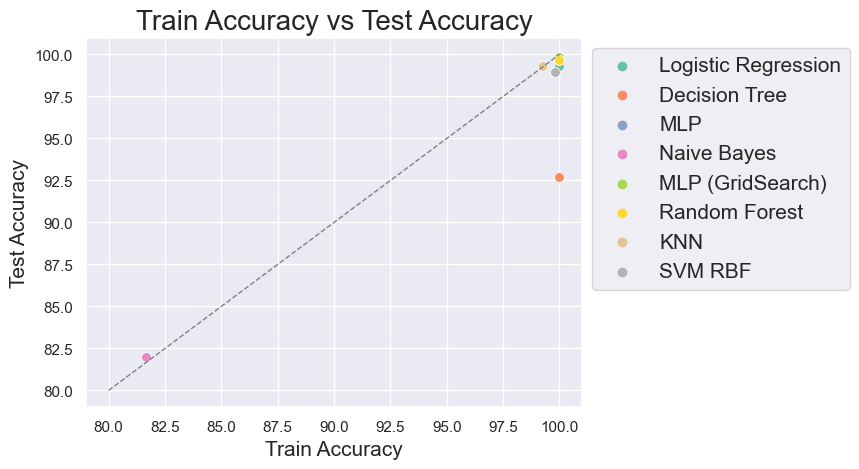

In [79]:
sns.set_style('darkgrid')
ax = sns.scatterplot(data=df_cv, x='train_accuracy', y='test_accuracy', hue='name',s=50, palette='Set2')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=15)
plt.plot([80, 100], [80, 100], color='gray', linestyle='--', linewidth=1)
plt.xlabel('Train Accuracy', fontsize=15)
plt.ylabel('Test Accuracy', fontsize=15)
plt.title('Train Accuracy vs Test Accuracy', fontsize=20)
plt.plot()

### Confusion Matrices

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

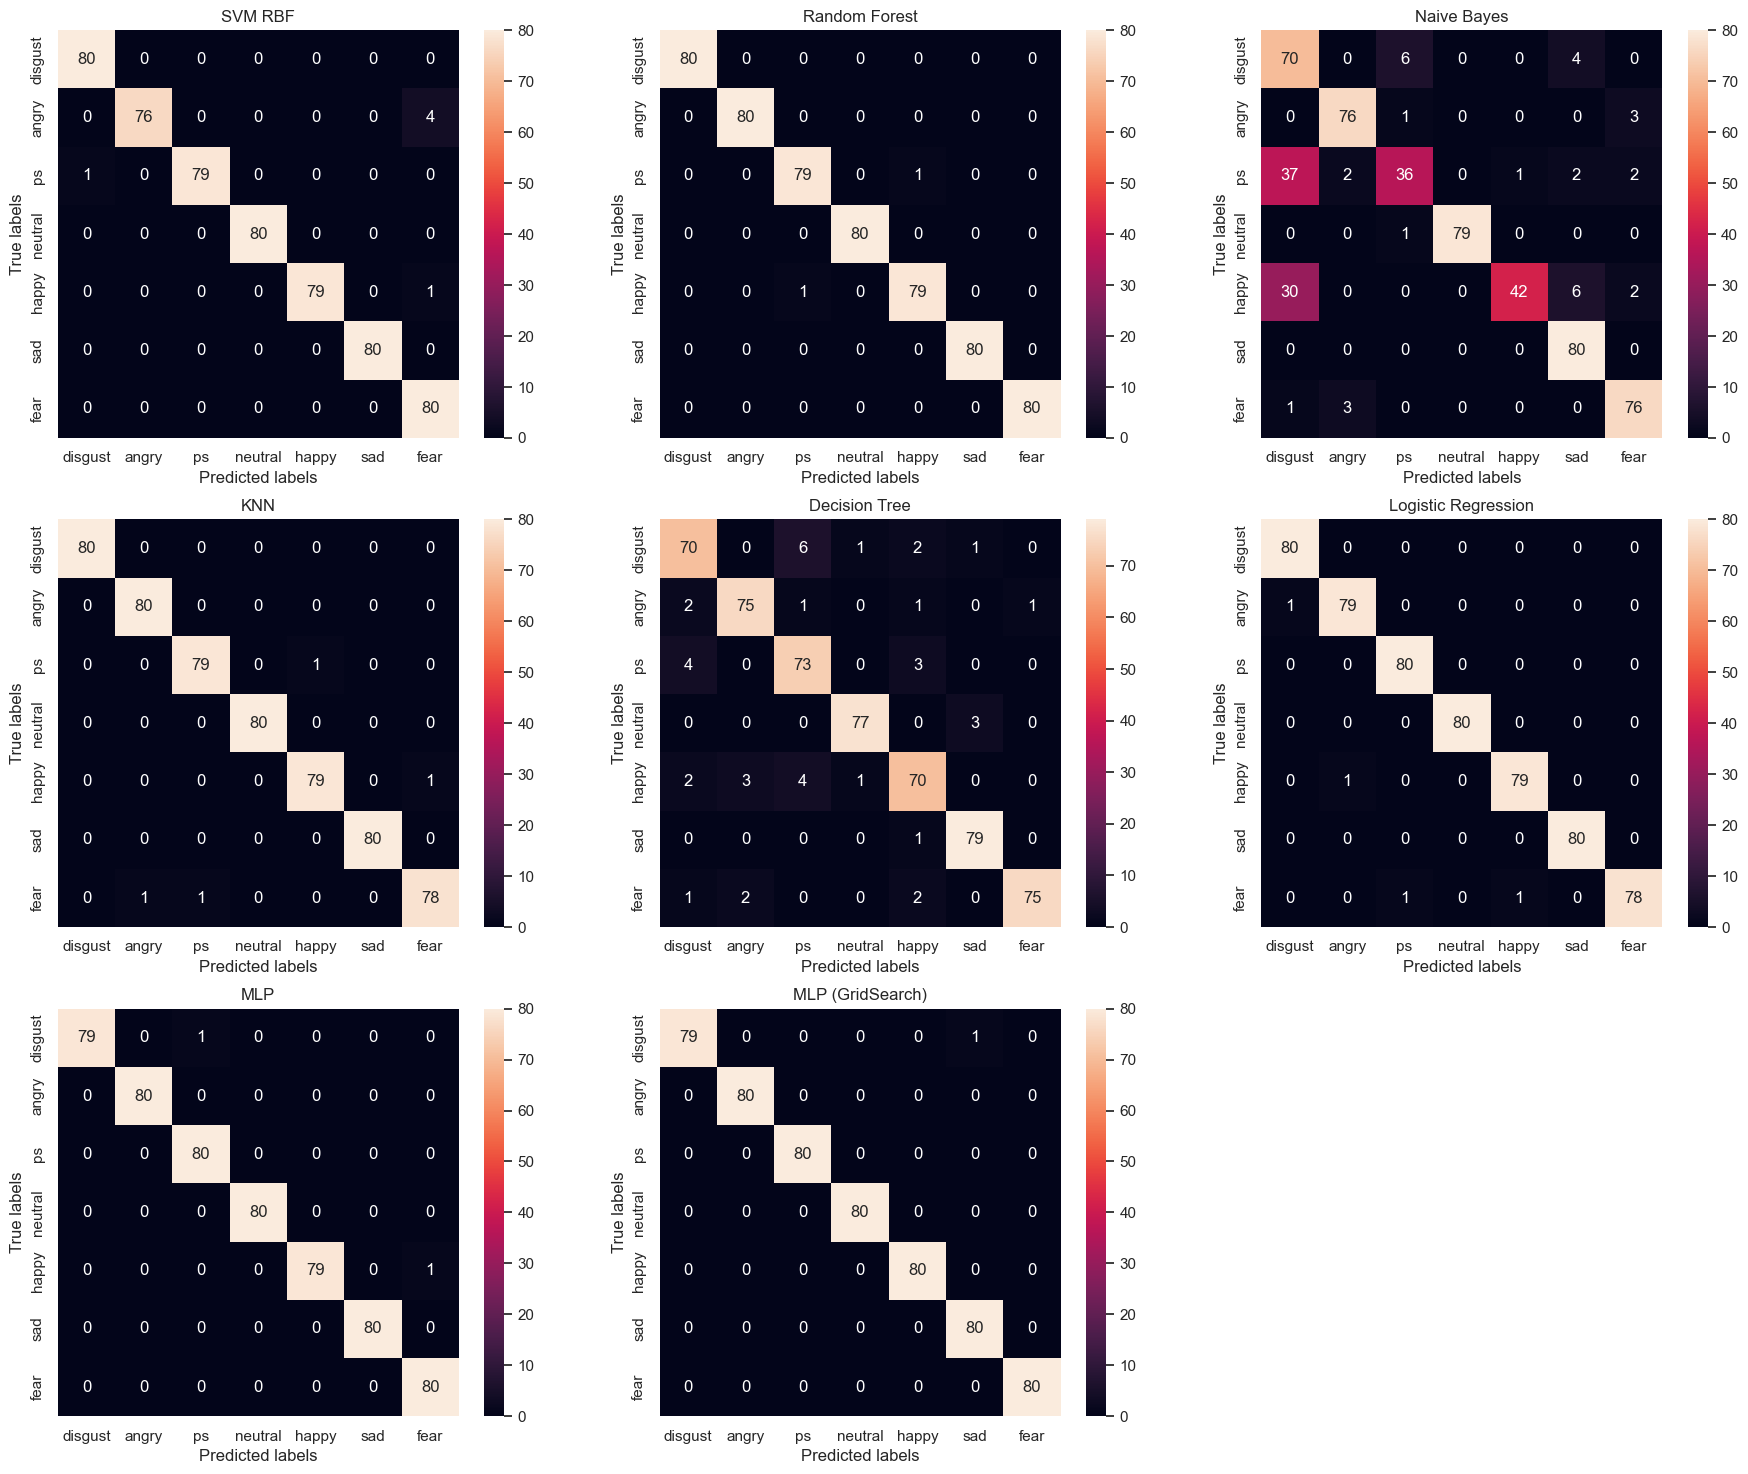

In [88]:
cms = [{"name": res['name'], "cm": res['confusion_matrix']} for res in results]

# Calculate number rows and columns needed for subplots
nrows = int(np.ceil(len(cms) / 3))
ncols = 3

empty_plots = nrows * ncols - len(cms)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 18))
axs = axs.ravel()

for i, cm in enumerate(cms):
    sns.heatmap(cm['cm'], annot=True, fmt='g', ax=axs[i])
    axs[i].set_xlabel('Predicted labels');
    axs[i].set_ylabel('True labels'); 
    axs[i].set_title(cm['name']); 
    axs[i].xaxis.set_ticklabels(emotion_classes);
    axs[i].yaxis.set_ticklabels(emotion_classes);

# Hide empty subplots
for i in range(empty_plots):
    fig.delaxes(axs[-i-1])

plt.show()

### Conclusion

In this report, we explored the task of classifying speech emotions using machine learning algorithms. We experimented with a range of algorithms, including SVM, Random Forest, Naive Bayes, KNN, Decision Tree, LR, and MLP, to identify the best-performing algorithm for the task.

Our results showed that almost all of the algorithms performed well, except for Naive Bayes and Decision Tree, which had lower accuracy scores. In contrast, MLP with grid search performed the best, achieving the highest accuracy score among all the algorithms we experimented with.

However, MLP also took the longest time to train, and the time taken to make predictions was also relatively high. This is a trade-off that must be considered when choosing an algorithm for a particular task. In contrast, KNN was the fastest model to train and Logistic Regression was the fastest algorithm to make predictions.

Overall, our findings suggest that different type of models are suitable for different kind of tasks. However, further experimentation with other algorithms or alternative configurations could lead to improved accuracy scores. Ultimately, this work contributes to the ongoing effort to develop reliable and accurate models for speech emotion recognition.